<a href="https://colab.research.google.com/github/graviada/colabRepo/blob/master/2022/DataAnalysisMethods%20(6%2C%202022)/DataAnalysisMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание 2

Компании:
> * Heineken
> * Anheuser-Busch InBev
> * Carlsberg
> * Brown-Forman
> * Asahi
> * Pernod Ricard
> * Compañía Cervecerías Unidas





In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.3 MB/s 
     |████████████████████████████████| 63 kB 330 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import yfinance as yf
import numpy as np

import seaborn as sbn
from sklearn.linear_model import LinearRegression
from math import log
from plotly.subplots import make_subplots

In [ ]:
def addline(fig, type="h", x0=0, x1=1, y0=0, y1=1):
  
  if type == "h":
    fig.add_shape(type='line',
                  x0 = x0,
                  x1 = x0,
                  y0 = y0,
                  y1 = y1,
                  line = dict(color="blue", dash="dashdot"),
                  opacity = 0.8)
  elif type == "v":
    fig.add_shape(type='line',
                  x0 = x0,
                  x1 = x1,
                  y0 = y0,
                  y1 = y0,
                  line = dict(color="LightSeaGreen", dash="dashdot"),
                  opacity = 0.8)
  elif type == "r":
    fig.add_shape(type='rect',
                  x0 = x0,
                  x1 = x1,
                  y0 = y0,
                  y1 = y1,
                  fillcolor='goldenrod',
                  opacity = 0.2)
  return fig

In [ ]:
def calculation_kb(y,x):
    n = len(y)
    M_y = (1 / n) * sum(y)
    S_y = ((1 / n) * sum((y - M_y) ** 2)) ** (1 / 2)
    M_x = (1 / n) * sum(x)
    S_x = ((1 / n) * sum((x - M_x) ** 2)) ** (1/2)
    r = ((1 / n) * sum(x * y) - M_x * M_y) / (S_y * S_x)
    b = M_y - r * M_x * S_y / S_x
    k = r * S_y / S_x
    return k, b

In [ ]:
date = '2022-03-22'
heineken = yf.download('HEINY','2011-02-10', date)[['Close', 'Volume']]
an_busch = yf.download('BUD','2011-02-10', date)[['Close', 'Volume']]
carlsberg = yf.download('CABGY','2011-02-10', date)[['Close', 'Volume']]
brown_for = yf.download('BF-B','2011-02-10', date)[['Close', 'Volume']]
asahi = yf.download('AHKSY','2011-02-10', date)[['Close', 'Volume']]
per_ric = yf.download('PRNDY','2011-02-10', date)[['Close', 'Volume']]
comp_cer = yf.download('CCU','2011-02-10', date)[['Close', 'Volume']]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
names = ['heineken', 'an_busch', 'carlsberg', 'brown_for',
             'asahi', 'per_ric', 'comp_cer']

dfs = [heineken, an_busch, carlsberg, brown_for, asahi, per_ric, comp_cer]

In [ ]:
for name in dfs:
  name = name.reset_index()

# Убираем строку с NA в данных компании
brown_for = brown_for.dropna()

In [ ]:
# Создание объединенного датафрейма
df_final = pd.concat([df.add_prefix(name + '_') for name, df in zip(names, dfs)], axis=1)

df_final = df_final.reset_index()

In [ ]:
# Удаление строк с нулевым объемом (Volume)
for name in names:
  df_final = df_final.drop(df_final[df_final[name + '_Volume'] == 0].index)

In [ ]:
T=67

print(df_final.Date.iloc[T], df_final.Date.iloc[2*T], df_final.Date.iloc[3*T], df_final.Date.iloc[4*T], df_final.Date.iloc[5*T],
      df_final.Date.iloc[6*T], df_final.Date.iloc[7*T], df_final.Date.iloc[8*T], df_final.Date.iloc[9*T], df_final.Date.iloc[10*T],
      df_final.Date.iloc[11*T], sep='\n')
      # df_final.Date.iloc[13*T], df_final.Date.iloc[14*T],
      # df_final.Date.iloc[15*T], df_final.Date.iloc[16*T], df_final.Date.iloc[17*T], df_final.Date.iloc[18*T],
      # df_final.Date.iloc[19*T], df_final.Date.iloc[20*T], sep='\n')

2011-08-08 00:00:00
2012-01-25 00:00:00
2012-06-01 00:00:00
2012-09-06 00:00:00
2012-12-13 00:00:00
2013-03-22 00:00:00
2013-06-27 00:00:00
2013-10-02 00:00:00
2014-01-08 00:00:00
2014-04-15 00:00:00
2014-07-22 00:00:00


1. Агрегированная характеристика для каждой компании

In [ ]:
def aggr_characteristic(df, names):
  df_char = pd.DataFrame()
  for name in names:
    i = 0
    df_char.insert(i, name + '_aggr', df[name + '_Close'] * df[name + '_Volume'])
    i += 1
  return df_char

In [ ]:
df_char = aggr_characteristic(df_final, names)

length_df_char = len(df_char)

In [ ]:
summa = []

for i in range(length_df_char):
  summ = 0
  for name in names:
    summ += df_char[name + '_aggr'].iloc[i]
  summa.append(log(summ))

df_char.insert(0, 'S', summa)

In [ ]:
summa = []

for i in range(length_df_char):
  summ = 0
  for name in names:
    summ += df_char[name + '_aggr'].iloc[i]
  summa.append(summ)

df_char.insert(1, 'S_clear', summa)

In [ ]:
df_char

S       S_clear  comp_cer_aggr  per_ric_aggr    asahi_aggr  \
8     18.858635  1.549534e+08   3.524428e+06  1.534680e+05  1.647000e+05   
9     18.601964  1.198755e+08   2.139960e+06  2.760000e+04  5.962500e+04   
10    18.329534  9.128841e+07   1.297288e+06  7.412000e+04  6.484800e+04   
11    17.977764  6.421604e+07   1.781535e+06  2.382900e+04  3.878000e+04   
12    18.337909  9.205609e+07   1.382880e+06  6.590500e+04  1.508560e+05   
...         ...           ...            ...           ...           ...   
2791  19.309767  2.432907e+08   2.755710e+06  7.768530e+06  3.693214e+06   
2792  19.141545  2.056209e+08   2.139528e+06  1.005504e+07  1.988260e+06   
2793  19.068973  1.912272e+08   2.178000e+06  3.863272e+06  1.998418e+06   
2794  19.427014  2.735553e+08   3.446895e+06  4.504014e+06  1.671651e+06   
2795  19.045694  1.868270e+08   2.914120e+06  4.247096e+06  1.786134e+06   

      brown_for_aggr  carlsberg_aggr  an_busch_aggr  heineken_aggr  
8       1.605471e+07    7.092400e+04   1.333449e+08   1.640310e+06  
9       1.004816e+07    1.274400e+04   1.073001e+08   2.872800e+05  
10      9.776249e+06    6.649500e+04   7.973088e+07   2.785320e+05  
11      2.237003e+07    1.501500e+04   3.980931e+07   1.775370e+05  
12      1.869739e+07    4.396000e+03   7.118156e+07   5.731100e+05  
...              ...             ...            ...            ...  
2791    8.960689e+07    1.243355e+07   1.203181e+08   6.714632e+06  
2792    5.796710e+07    1.995162e+07   1.099300e+08   3.589272e+06  
2793    4.467318e+07    5.940887e+07   7.639383e+07   2.711679e+06  
2794    1.012069e+08    2.589332e+07   1.339966e+08   2.835924e+06  
2795    6.019938e+07    1.728479e+07   9.821508e+07   2.180385e+06  

[2665 rows x 9 columns]

In [ ]:
day_list = pd.Series([i for i in range(length_df_char)])

In [ ]:
_layout = go.Layout(
    title={
        'text': 'График показателя S в полулогарифмическом масштабе',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title='ln(S)',
    xaxis_title='t, дни',
    width=1700,
    height=700,
    plot_bgcolor='rgba(0,0,0,0)'
)
fig = go.Figure([go.Scatter(x=day_list, y=df_char.S, line=dict(color='LightSeaGreen', width=1.5))], layout=_layout)

fig = addline(fig, type= "r", y0=17, y1=21.2, x0=day_list.iloc[342], x1=day_list.iloc[1176])
fig = addline(fig, type= "r", y0=17, y1=21.2, x0=day_list.iloc[1477], x1=day_list.iloc[1654])
fig = addline(fig, type= "r", y0=17, y1=21.2, x0=day_list.iloc[1917], x1=day_list.iloc[1996])
fig = addline(fig, type= "r", y0=17, y1=21.2, x0=day_list.iloc[2438], x1=day_list.iloc[2567])

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

In [ ]:
_layout = go.Layout(
    title={
        'text': 'График показателя S в полулогарифмическом масштабе',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title='ln(S)',
    xaxis_title='t, дни',
    width=600,
    height=700,
    plot_bgcolor='rgba(0,0,0,0)'
)

fig = go.Figure([go.Scatter(x=day_list.iloc[320:1176], y=df_char.S.iloc[320:1176], line=dict(color='LightSeaGreen', width=1.5))], 
                layout=_layout)

fig = addline(fig, type= "r", y0=17, y1=21.2, x0=day_list.iloc[436], x1=day_list.iloc[492])
fig = addline(fig, type= "r", y0=17, y1=21.2, x0=day_list.iloc[738], x1=day_list.iloc[865])
fig = addline(fig, type= "r", y0=17, y1=21.2, x0=day_list.iloc[1051], x1=day_list.iloc[1143])

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

2. Темпы роста

In [ ]:
def k_rates_growth(S, t1, t2):
  return (log(S.iloc[t2] / S.iloc[t1])) / (t2 - t1)

def process_time(k):
  return 1 / k

In [ ]:
t_dict = [[436, 492], [738, 865], [1051, 1143], [1477, 1654], [1917, 1996], [2438, 2567]]

for i in range(6):
  k = k_rates_growth(df_char.S, t_dict[i][0], t_dict[i][1])
  print('Темп роста на {} участке: {:.7f}'.format(i+1, k))
  print('Характерное время процесса: {:.5f}\n'.format(process_time(k)))

Темп роста на 1 участке: 0.0019270
Характерное время процесса: 518.95088

Темп роста на 2 участке: 0.0007371
Характерное время процесса: 1356.68933

Темп роста на 3 участке: 0.0006815
Характерное время процесса: 1467.39041

Темп роста на 4 участке: 0.0006792
Характерное время процесса: 1472.26991

Темп роста на 5 участке: 0.0007238
Характерное время процесса: 1381.63185

Темп роста на 6 участке: 0.0004218
Характерное время процесса: 2370.59661



Длинные участки не брать, брать поменьше, рассматривать отдельно

### Задание 3
Определить, насколько каждая фирма соответствует структуре развития отрасли в целом. Для этого изобразить на одном графике в полулогарифмическом масштабе агрегированные характеристики фирм и интегральную характеристику всей отрасли. Существуют ли компании, которые живут по другим ритмам?

In [ ]:
local_chars = pd.DataFrame()
j = 0
help_list = []

for name in names:
  for i in range(length_df_char):
    help_list.append(log(df_char[name + '_aggr'].iloc[i]))
  local_chars.insert(j, 'ln_' + name, help_list)
  j += 1
  del help_list[:]

In [ ]:
_layout = go.Layout(
    title={
        'text': 'Сравнение интегральной характеристики S с агрегированными характеристиками фирм',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title='ln(Close * Volume) - 5',
    xaxis_title='t, дни',
    width=1000,
    height=700,
    plot_bgcolor='rgba(0,0,0,0)'
)

fig = go.Figure([
                 go.Scatter(x=day_list, y=df_char.S, line=dict(color='LightSeaGreen', width=1.5), name='S'),
                 go.Scatter(x=day_list, y=local_chars.ln_heineken + 0.6, line=dict(color='goldenrod', width=1.5), name='Heineken'),
                 go.Scatter(x=day_list, y=local_chars.ln_an_busch - 9, line=dict(color='#CAB39F', width=1.5), name='Anheuser-Busch InBev'),
                 go.Scatter(x=day_list, y=local_chars.ln_carlsberg - 9.5, line=dict(color='#56B4E9', width=1.5), name='Carlsberg'),
                 go.Scatter(x=day_list, y=local_chars.ln_brown_for - 21, line=dict(color='#afff10', width=1.5), name='Brown-Forman'),
                 go.Scatter(x=day_list, y=local_chars.ln_asahi - 22, line=dict(color='#f498c2', width=1.5), name='Asahi'),
                 go.Scatter(x=day_list, y=local_chars.ln_per_ric - 31, line=dict(color='grey', width=1.5), name='Pernod Ricard'),
                 go.Scatter(x=day_list, y=local_chars.ln_comp_cer - 40, line=dict(color='#ffcaaf', width=1.5), name='Compañía Cervecerías Unidas')
                 ], layout=_layout)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

In [ ]:
df_final.iloc[1331]

Date                2016-12-01 00:00:00
heineken_Close                36.279999
heineken_Volume                   72600
an_busch_Close                99.910004
an_busch_Volume                 7462000
carlsberg_Close                   16.43
carlsberg_Volume                 162500
brown_for_Close                   35.68
brown_for_Volume                1681250
asahi_Close                   17.290001
asahi_Volume                      23800
per_ric_Close                     20.49
per_ric_Volume                   324500
comp_cer_Close                     20.0
comp_cer_Volume                  544400
Name: 1462, dtype: object

### Задание 4
Необходимо рассмотреть данные в аллометрической системе координат. Построить графики, где по оси абсцисс – натуральный логарифм интегральной характеристики (S), по оси ординат – натуральный логарифм агрегированного показателя фирмы. Выяснить, какие компании развиваются по общему закону, какие опережают отрасль, а какие отстают.

Квадратные графики, попробовать кум. сумму сделать 

In [ ]:
fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=('Heineken', 'Anheuser-Busch InBev', 'Carlsberg', 'Brown-Forman',
                   'Asahi', 'Pernod Ricard', 'Compañía Cervecerías Unidas'))

x_trace = df_char.S
clr = 'darkblue'

# fig.add_trace(go.Scatter(x=x_trace, y=df_char.cum_heineken, mode='markers', marker=dict(color=clr)), row=1, col=1)
# fig.add_trace(go.Scatter(x=x_trace, y=df_char.cum_an_busch, mode='markers', marker=dict(color=clr)), row=1, col=2)
# fig.add_trace(go.Scatter(x=x_trace, y=df_char.cum_carlsberg, mode='markers', marker=dict(color=clr)), row=1, col=3)
# fig.add_trace(go.Scatter(x=x_trace, y=df_char.cum_brown_for, mode='markers', marker=dict(color=clr)), row=2, col=1)
# fig.add_trace(go.Scatter(x=x_trace, y=df_char.cum_asahi, mode='markers', marker=dict(color=clr)), row=2, col=2)
# fig.add_trace(go.Scatter(x=x_trace, y=df_char.cum_per_ric, mode='markers', marker=dict(color=clr)), row=2, col=3)
# fig.add_trace(go.Scatter(x=x_trace, y=df_char.cum_comp_cer, mode='markers', marker=dict(color=clr)), row=3, col=1)

fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_heineken, mode='markers', marker=dict(color=clr)), row=1, col=1)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_an_busch, mode='markers', marker=dict(color=clr)), row=1, col=2)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_carlsberg, mode='markers', marker=dict(color=clr)), row=1, col=3)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_brown_for, mode='markers', marker=dict(color=clr)), row=2, col=1)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_asahi, mode='markers', marker=dict(color=clr)), row=2, col=2)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_per_ric, mode='markers', marker=dict(color=clr)), row=2, col=3)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_comp_cer, mode='markers', marker=dict(color=clr)), row=3, col=1)

fig.update_layout(
    width=800,
    height=800,
    plot_bgcolor='rgba(0,0,0,0)',
    title={
          'text': 'Данные в логарифмической системе координат',
          'xanchor': 'left'},
    showlegend=False)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

In [ ]:
def draw_4(name):
  _layout = go.Layout(
      title={
          'text': 'Данные в логарифмической системе координат',
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'},
      yaxis_title='ln(' + name + '_Close * ' + name + '_Volume)',
      xaxis_title='ln(S)',
      width=700,
      height=700,
      plot_bgcolor='rgba(0,0,0,0)'
  )

  fig = go.Figure([go.Scatter(x=df_char.S, y=local_chars['ln_' + name], mode='markers', marker=dict(color='darkblue'))], layout=_layout)

  fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
  fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

  fig.show()

In [ ]:
draw_4('an_busch')

In [ ]:
draw_4('brown_for')

In [ ]:
# draw_4('asahi')

2. Кумулятивная сумма

In [ ]:
# кумулятивная сумма от агрегированного показателя 
for name in names:
  df_char['cum_' + name] = np.log(df_char[name + '_aggr'].cumsum())

df_char['cum_S'] = np.log(df_char['S'].cumsum())

In [ ]:
_layout = go.Layout(
    title={
        'text': 'Накопленная сумма логарифмов компании',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title='ln(Close * Volume).cumsum()',
    xaxis_title='ln(S).cumsum()',
    width=800,
    height=700,
    plot_bgcolor='rgba(0,0,0,0)'
)

fig = go.Figure([
                 # go.Scatter(x=df_char.cum_S, y=df_char.cum_S, mode='markers', line=dict(color='LightSeaGreen', width=1.5), name='S'),
                 go.Scatter(x=df_char.cum_S, y=df_char.cum_heineken, mode='markers', line=dict(color='goldenrod', width=1.5), name='Heineken'),
                 go.Scatter(x=df_char.cum_S, y=df_char.cum_an_busch, mode='markers', line=dict(color='#CAB39F', width=1.5), name='Anheuser-Busch InBev'),
                 go.Scatter(x=df_char.cum_S, y=df_char.cum_carlsberg, mode='markers', line=dict(color='#56B4E9', width=1.5), name='Carlsberg'),
                 go.Scatter(x=df_char.cum_S, y=df_char.cum_brown_for, mode='markers', line=dict(color='#afff10', width=1.5), name='Brown-Forman'),
                 go.Scatter(x=df_char.cum_S, y=df_char.cum_asahi, mode='markers', line=dict(color='#f498c2', width=1.5), name='Asahi'),
                 go.Scatter(x=df_char.cum_S, y=df_char.cum_per_ric, mode='markers', line=dict(color='grey', width=1.5), name='Pernod Ricard'),
                 go.Scatter(x=df_char.cum_S, y=df_char.cum_comp_cer, mode='markers', line=dict(color='#ffcaaf', width=1.5), name='Compañía Cervecerías Unidas')
                 ], layout=_layout)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

In [ ]:
df_char.columns

Index(['S', 'S_clear', 'comp_cer_aggr', 'per_ric_aggr', 'asahi_aggr',
       'brown_for_aggr', 'carlsberg_aggr', 'an_busch_aggr', 'heineken_aggr',
       'cum_heineken', 'cum_an_busch', 'cum_carlsberg', 'cum_brown_for',
       'cum_asahi', 'cum_per_ric', 'cum_comp_cer', 'cum_S'],
      dtype='object')

In [ ]:
local_chars.columns

Index(['ln_heineken', 'ln_an_busch', 'ln_carlsberg', 'ln_brown_for',
       'ln_asahi', 'ln_per_ric', 'ln_comp_cer'],
      dtype='object')

3. Противофаза на основе п. 2

In [ ]:
# Посмотрим противофазу для Pernod Ricard
# СПРОСИТЬ, ЧТО ИСКАТЬ И ОСТАВИТЬ ЛИ ВООБЩЕ
_layout = go.Layout(
      title={
          'text': 'Анаморфоза для компании Pernod Ricard',
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'},
      yaxis_title='1/ln(per_ric_Close * per_ric_Volume)',
      xaxis_title='t',
      width=700,
      height=700,
      plot_bgcolor='rgba(0,0,0,0)'
  )

fig = go.Figure([go.Scatter(x=day_list, y=1/local_chars['ln_per_ric'], marker=dict(color='darkblue'))], layout=_layout)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

https://plotly.com/python/subplots/

4. Уровни е на примере 2-ух компаний

### Задание 5
Необходимо рассмотреть, как взаимодействуют компании между собой попарно. Для этого построить для каждой пары компаний логарифмическую систему координат, где по оси ординат – агрегированная характеристика одной компании, по оси абсцисс – агрегированная характеристика второй компании.
Возможные варианты взаимодействия:
>1. Дружественные отношения. - линейная
>
>2. «Хищник-жертва». - нелинейная
>
>3. Нейтральные отношения. - это когда полоска

Математические модели борьбы за существование
В. Вольтерра - для 5

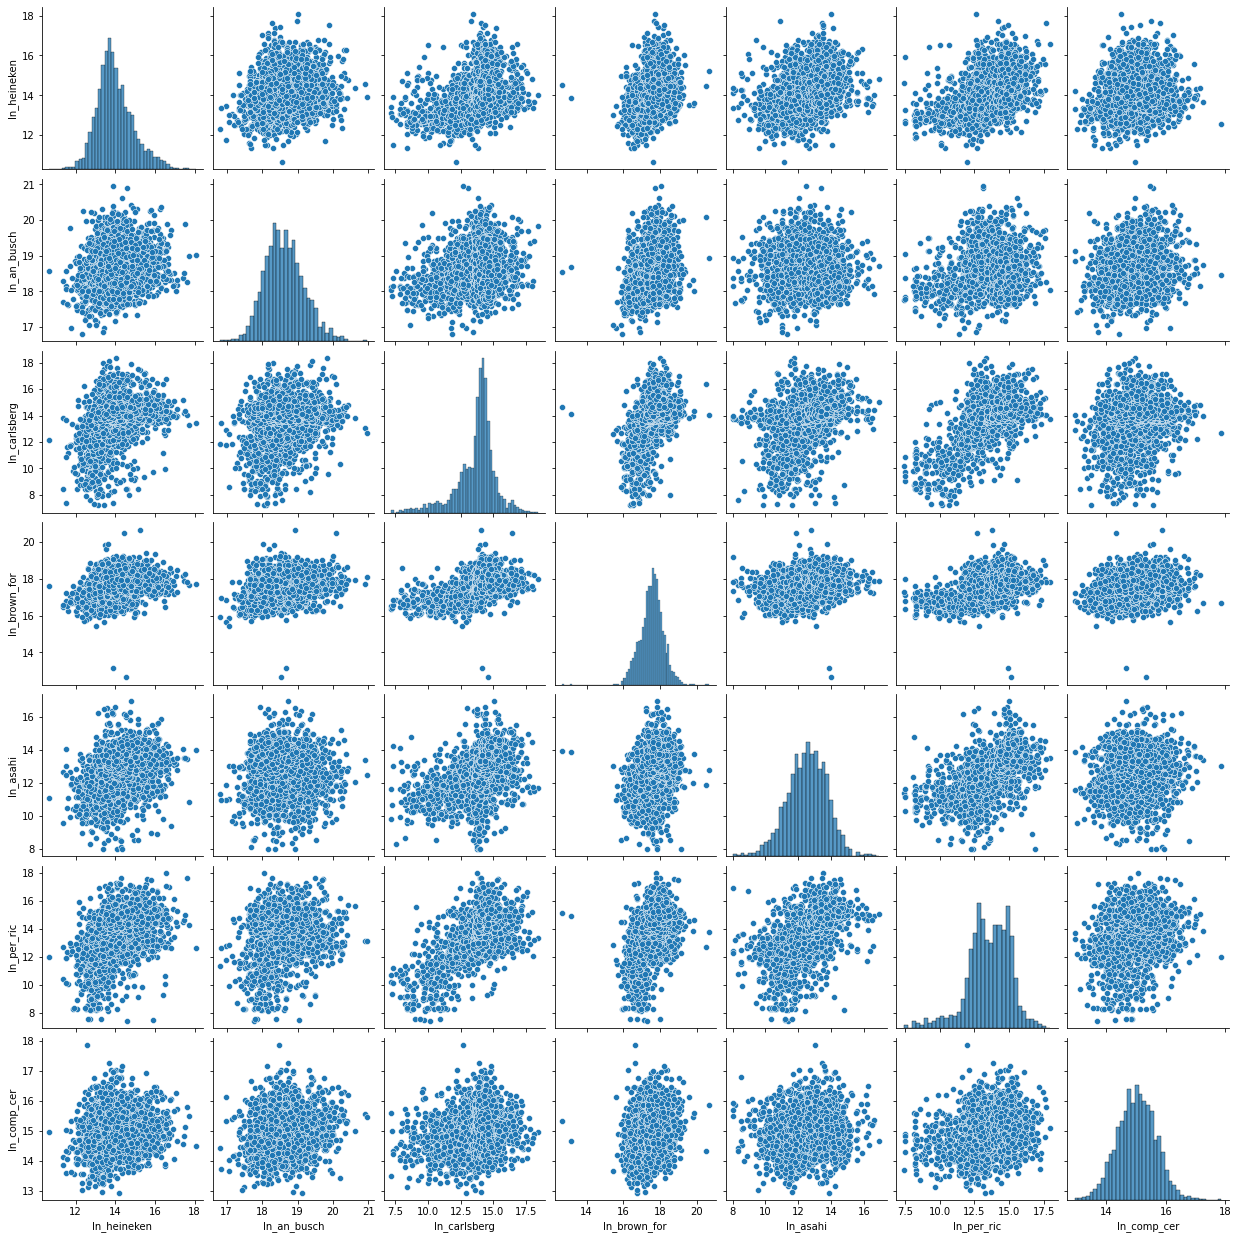

In [ ]:
sbn.pairplot(local_chars)
plt.show()

In [ ]:
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Anheuser-Busch InBev', 'Carlsberg', 'Brown-Forman',
                   'Asahi', 'Pernod Ricard', 'Compañía Cervecerías Unidas'))

x_trace = local_chars.ln_heineken
clr = 'green'

fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_an_busch, mode='markers', marker=dict(color=clr)), row=1, col=1)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_carlsberg, mode='markers', marker=dict(color=clr)), row=1, col=2)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_brown_for, mode='markers', marker=dict(color=clr)), row=1, col=3)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_asahi, mode='markers', marker=dict(color=clr)), row=2, col=1)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_per_ric, mode='markers', marker=dict(color=clr)), row=2, col=2)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_comp_cer, mode='markers', marker=dict(color=clr)), row=2, col=3)

fig.update_layout(
    width=1000,
    height=800,
    plot_bgcolor='rgba(0,0,0,0)',
    title={
          'text': 'Данные в логарифмической системе координат для компании Heineken',
          'xanchor': 'left'},
    showlegend=False)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

In [ ]:
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Heineken', 'Carlsberg', 'Brown-Forman',
                   'Asahi', 'Pernod Ricard', 'Compañía Cervecerías Unidas'))

x_trace = local_chars.ln_an_busch
clr = 'green'

fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_heineken, mode='markers', marker=dict(color=clr)), row=1, col=1)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_carlsberg, mode='markers', marker=dict(color=clr)), row=1, col=2)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_brown_for, mode='markers', marker=dict(color=clr)), row=1, col=3)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_asahi, mode='markers', marker=dict(color=clr)), row=2, col=1)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_per_ric, mode='markers', marker=dict(color=clr)), row=2, col=2)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_comp_cer, mode='markers', marker=dict(color=clr)), row=2, col=3)

fig.update_layout(
    width=1000,
    height=800,
    plot_bgcolor='rgba(0,0,0,0)',
    title={
          'text': 'Данные в логарифмической системе координат для компании Anheuser-Busch InBev',
          'xanchor': 'left'},
    showlegend=False)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

In [ ]:
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Heineken', 'Anheuser-Busch InBev', 'Brown-Forman',
                   'Asahi', 'Pernod Ricard', 'Compañía Cervecerías Unidas'))

x_trace = local_chars.ln_carlsberg
clr = 'green'

fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_heineken, mode='markers', marker=dict(color=clr)), row=1, col=1)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_an_busch, mode='markers', marker=dict(color=clr)), row=1, col=2)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_brown_for, mode='markers', marker=dict(color=clr)), row=1, col=3)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_asahi, mode='markers', marker=dict(color=clr)), row=2, col=1)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_per_ric, mode='markers', marker=dict(color=clr)), row=2, col=2)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_comp_cer, mode='markers', marker=dict(color=clr)), row=2, col=3)

fig.update_layout(
    width=1000,
    height=800,
    plot_bgcolor='rgba(0,0,0,0)',
    title={
          'text': 'Данные в логарифмической системе координат для компании Carlsberg',
          'xanchor': 'left'},
    showlegend=False)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

In [ ]:
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Heineken', 'Anheuser-Busch InBev', 'Carlsberg',
                   'Asahi', 'Pernod Ricard', 'Compañía Cervecerías Unidas'))

x_trace = local_chars.ln_brown_for
clr = 'green'

fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_heineken, mode='markers', marker=dict(color=clr)), row=1, col=1)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_an_busch, mode='markers', marker=dict(color=clr)), row=1, col=2)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_carlsberg, mode='markers', marker=dict(color=clr)), row=1, col=3)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_asahi, mode='markers', marker=dict(color=clr)), row=2, col=1)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_per_ric, mode='markers', marker=dict(color=clr)), row=2, col=2)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_comp_cer, mode='markers', marker=dict(color=clr)), row=2, col=3)

fig.update_layout(
    width=1000,
    height=800,
    plot_bgcolor='rgba(0,0,0,0)',
    title={
          'text': 'Данные в логарифмической системе координат для компании Brown-Forman',
          'xanchor': 'left'},
    showlegend=False)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

In [ ]:
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Heineken', 'Anheuser-Busch InBev', 'Carlsberg', 'Brown-Forman',
                   'Pernod Ricard', 'Compañía Cervecerías Unidas'))

x_trace = local_chars.ln_asahi
clr = 'green'

fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_heineken, mode='markers', marker=dict(color=clr)), row=1, col=1)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_an_busch, mode='markers', marker=dict(color=clr)), row=1, col=2)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_carlsberg, mode='markers', marker=dict(color=clr)), row=1, col=3)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_brown_for, mode='markers', marker=dict(color=clr)), row=2, col=1)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_per_ric, mode='markers', marker=dict(color=clr)), row=2, col=2)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_comp_cer, mode='markers', marker=dict(color=clr)), row=2, col=3)

fig.update_layout(
    width=1000,
    height=800,
    plot_bgcolor='rgba(0,0,0,0)',
    title={
          'text': 'Данные в логарифмической системе координат для компании Asahi',
          'xanchor': 'left'},
    showlegend=False)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

In [ ]:
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Heineken', 'Anheuser-Busch InBev', 'Carlsberg', 'Brown-Forman',
                   'Asahi', 'Compañía Cervecerías Unidas'))

x_trace = local_chars.ln_per_ric
clr = 'green'

fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_heineken, mode='markers', marker=dict(color=clr)), row=1, col=1)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_an_busch, mode='markers', marker=dict(color=clr)), row=1, col=2)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_carlsberg, mode='markers', marker=dict(color=clr)), row=1, col=3)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_brown_for, mode='markers', marker=dict(color=clr)), row=2, col=1)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_asahi, mode='markers', marker=dict(color=clr)), row=2, col=2)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_comp_cer, mode='markers', marker=dict(color=clr)), row=2, col=3)

fig.update_layout(
    width=1000,
    height=800,
    plot_bgcolor='rgba(0,0,0,0)',
    title={
          'text': 'Данные в логарифмической системе координат для компании Pernod Ricard',
          'xanchor': 'left'},
    showlegend=False)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

In [ ]:
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Heineken', 'Anheuser-Busch InBev', 'Carlsberg', 'Brown-Forman',
                   'Asahi', 'Pernod Ricard'))

x_trace = local_chars.ln_comp_cer
clr = 'green'

# for i in range(1, 3):
#   for j in range(1, 4):
#     fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_heineken, mode='markers', marker=dict(color=clr)), row=1, col=1)

fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_heineken, mode='markers', marker=dict(color=clr)), row=1, col=1)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_an_busch, mode='markers', marker=dict(color=clr)), row=1, col=2)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_carlsberg, mode='markers', marker=dict(color=clr)), row=1, col=3)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_brown_for, mode='markers', marker=dict(color=clr)), row=2, col=1)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_asahi, mode='markers', marker=dict(color=clr)), row=2, col=2)
fig.add_trace(go.Scatter(x=x_trace, y=local_chars.ln_per_ric, mode='markers', marker=dict(color=clr)), row=2, col=3)

fig.update_layout(
    width=1000,
    height=800,
    plot_bgcolor='rgba(0,0,0,0)',
    title={
          'text': 'Данные в логарифмической системе координат для компании Compañía Cervecerías Unidas',
          'xanchor': 'left'},
    showlegend=False)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

### Задание 6

1. Применение к данным анаморфозы модели интенсивного роста (данные в координатах 1/S к t)

In [ ]:
_layout = go.Layout(
      title={
          'text': 'Анаморфоза модели интенсивного роста',
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'},
      yaxis_title='1/S',
      xaxis_title='t',
      width=700,
      height=700,
      plot_bgcolor='rgba(0,0,0,0)'
  )

fig = go.Figure([go.Scatter(x=day_list, y=1/df_char['S_clear'], marker=dict(color='LightSeaGreen'))], layout=_layout)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

In [ ]:
def linear_f(data_time, data_y):
  y = 1 / data_y
  time = np.array(data_time)
  time = time.reshape(-1, 1)
  model = LinearRegression().fit(time, y)
  return model

In [ ]:
# 920:1030
first = linear_f(day_list[97:196], df_char.S_clear[97:196])
second = linear_f(day_list[920:1030], df_char.S_clear[920:1030])
third = linear_f(day_list[1894:1995], df_char.S_clear[1894:1995])

In [ ]:
x_all = np.array(day_list)

# 1
y_all_f = first.predict(x_all.reshape(-1, 1))

# 2
y_all_s = second.predict(x_all.reshape(-1, 1))

# 3
y_all_t = third.predict(x_all.reshape(-1, 1))

In [ ]:
_layout = go.Layout(
    yaxis_title='1/S',
    title={
          'text': 'Анаморфоза модели интенсивного роста',
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'},
    xaxis_title='t',
    width=600,
    height=600,
    plot_bgcolor='rgba(0,0,0,0)'
)

fig = go.Figure([
    go.Scatter(x=day_list, name='1/S', y=1/(df_char.S_clear), line=dict(color='LightSeaGreen', width=1.5)),
    go.Scatter(x=day_list[97:396], y=y_all_f[97:396], name='prediction 1', line=dict(color='red', width=2)),
    go.Scatter(x=day_list[920:2100], y=y_all_s[920:2100], name='prediction 2', line=dict(color='red', width=2)),
    go.Scatter(x=day_list[1894:2700], y=y_all_t[1894:2700], name='prediction 3', line=dict(color='red', width=2))
], layout=_layout)

a = 0
b = 34e-9
fig.update_yaxes(range=[a, b])

fig = addline(fig, type= "r", y0=a, y1=b, x0=day_list[97], x1=day_list[196])
fig = addline(fig, type= "r", y0=a, y1=b, x0=day_list[920], x1=day_list[1030])
fig = addline(fig, type= "r", y0=a, y1=b, x0=day_list[1894], x1=day_list[1995])

fig = addline(fig, x0=day_list[392], y0=a, y1=b)
fig = addline(fig, x0=day_list[1125], y0=a, y1=b)
fig = addline(fig, x0=day_list[2266], y0=a, y1=b)

fig.add_trace(go.Scatter(x=[day_list[392], day_list[1125], day_list[2266]], 
                         y=[1e-10, 1e-10, 1e-10], mode="markers",
                         marker=dict(color="red", size=7)))

fig.update_layout(showlegend=False)
fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

In [ ]:
def calculation_kb(y,x): #Построение первой анаморфозы
    n = len(y)
    M_y = (1 / n)*sum(y)
    S_y = ((1 / n)*sum((y - M_y)**2))**(1/2)
    M_x = (1 / n)*sum(x)
    # S_x = ((1 / n)*sum((x - M_x)**2))**(1/2)

    S_x = 0
    for i in x:
      S_x = S_x + (i - M_x)**2
    S_x = ((1 / n) * S_x)**(1/2)

    r = ((1 / n)*sum(x*y) - M_x*M_y)/(S_y*S_x)
    b = M_y - r*M_x*S_y/S_x
    k = r*S_y/S_x
    return k, b

In [ ]:
df_char['day'] = pd.Series(x for x in range(2797))

In [ ]:
fig = go.Figure()
fig.update_layout(
    autosize=False,
    title={
          'text': 'Анаморфоза модели интенсивного роста',
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'},
    xaxis_title='t',
    yaxis_title='1/S',
    width=600,
    height=600,
    plot_bgcolor='rgba(0,0,0,0)')

t = df_char.day
Cl_Vol_int = df_char.S_clear
r = 'red'

a = 0
b = 34e-9
fig.update_yaxes(range=[a, b])

fig.add_trace(go.Scatter(x=t,y=1/Cl_Vol_int, line=dict(color='LightSeaGreen')))

x1,x2 = 97,196
k1,b1 = calculation_kb(1/Cl_Vol_int[x1:x2],t[x1:x2])
fig.add_trace(go.Scatter(y=(1/Cl_Vol_int[x1:x2]),x=t[x1:x2],line=dict(color="goldenrod")))
fig.add_trace(go.Scatter(y=[k1*t[x1]+b1,0],x=[t[x1],-b1/k1],line=dict(color=r, width=2, dash='solid')))

x1,x2 = 920,1030
k2,b2 = calculation_kb(1/Cl_Vol_int[x1:x2],t[x1:x2])
fig.add_trace(go.Scatter(y=(1/Cl_Vol_int[x1:x2]),x=t[x1:x2],line=dict(color="goldenrod")))
fig.add_trace(go.Scatter(y=[k2*t[x1]+b2,0],x=[t[x1],-b2/k2],line=dict(color=r, width=2, dash='solid')))

x1,x2 = 1894,1995
k3,b3 = calculation_kb(1/Cl_Vol_int[x1:x2],t[x1:x2])
fig.add_trace(go.Scatter(y=(1/Cl_Vol_int[x1:x2]),x=t[x1:x2],line=dict(color="goldenrod")))
fig.add_trace(go.Scatter(y=[k3*t[x1]+b3,0],x=[t[x1],-b3/k3],line=dict(color=r, width=2, dash='solid')))

# fig = addline(fig, type= "r", y0=a, y1=b, x0=t[97], x1=t[196])
# fig = addline(fig, type= "r", y0=a, y1=b, x0=t[920], x1=t[1030])
# fig = addline(fig, type= "r", y0=a, y1=b, x0=t[1894], x1=t[1995])

fig = addline(fig, x0=t[680], y0=a, y1=b)
fig = addline(fig, x0=t[1253], y0=a, y1=b)
fig = addline(fig, x0=t[2402], y0=a, y1=b)

fig.update_layout(showlegend=False)
fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

print(-b1/k1, k1, b1, np.log(k1))
print(-b2/k2, k2, b2, np.log(k2))
print(-b3/k3, k3, b3, np.log(k3))

fig.show()

680.7374729984406 -2.378715746188675e-11 1.6192809460420786e-08 nan
1253.6973422700937 -3.265703343791444e-11 4.094203602753891e-08 nan
2402.376875141086 -1.7534909723176826e-11 4.212546162664659e-08 nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning:

invalid value encountered in log



### Хренотень

---



In [ ]:
df_char['day'] = pd.Series(x for x in range(2797))

In [ ]:
t = df_char.day
m = 0
fig = go.Figure()
fig.update_layout(
    autosize=False,
    xaxis_title='time',
    yaxis_title='1/S',
    width=600,
    height=600,
    paper_bgcolor="white")
fig.add_trace(go.Scatter(x=t,y=1/(df_char.S_clear-m)))

x1,x2 = 8,1030
k1,b1 = calculation_kb(1/(df_char.S_clear[x1:x2]-m),t[x1:x2])
# print(k1, b1)
# print(k1*t[x1]+b1)
# print(t[x1],-b1/k1)
fig.add_trace(go.Scatter(y=[k1*t[x1]+b1,0],x=[t[x1],-b1/k1],line=dict(width=2, dash='solid')))
fig.add_trace(go.Scatter(x=[-b1/k1,-b1/k1],y=[1e-8,0], line=dict(color='black', width=2, dash='dot')))
fig.add_trace(go.Scatter(y=(1/(df_char.S_clear[x1:x2]-m)),x=t[x1:x2],line=dict(color="green")))

x1,x2 = 1494,1654
k2,b2 = calculation_kb(1/(df_char.S_clear[x1:x2]-m),t[x1:x2])
fig.add_trace(go.Scatter(y=[k2*t[x1]+b2,0],x=[t[x1],-b2/k2],line=dict(width=2, dash='solid')))
fig.add_trace(go.Scatter(x=[-b2/k2,-b2/k2],y=[1e-8,0], line=dict(color='black', width=2, dash='dot')))
fig.add_trace(go.Scatter(y=(1/(df_char.S_clear[x1:x2]-m)),x=t[x1:x2],line=dict(color="green")))

x1,x2 = 1894,1995
k3,b3 = calculation_kb(1/(df_char.S_clear[x1:x2]-m),t[x1:x2])
fig.add_trace(go.Scatter(y=[k3*t[x1]+b3,0],x=[t[x1],-b3/k3],line=dict(width=2, dash='solid')))
fig.add_trace(go.Scatter(x=[-b3/k3,-b3/k3],y=[1e-8,0], line=dict(color='black', width=2, dash='dot')))
fig.add_trace(go.Scatter(y=(1/(df_char.S_clear[x1:x2]-m)),x=t[x1:x2],line=dict(color="green")))

print(k1, k2, k3)
print(log(-k1), log(-k2), log(-k3))
print(-b1/k1)
print(-b2/k2)
print(-b3/k3)
fig.show()

-5.803288347579592e-12 -1.2248323148924427e-11 -1.7534909723176826e-11
-25.872596402556038 -25.125632074109618 -24.76682738072851
1925.5063874406035
2064.0167384287624
2402.376875141086




---
### Не хренотень



In [ ]:
first = linear_f(day_list[97:196], df_char.S[97:196])
second = linear_f(day_list[920:1030], df_char.S[920:1030])
third = linear_f(day_list[1894:1995], df_char.S[1894:1995])

In [ ]:
# 1
y_all_f = first.predict(x_all.reshape(-1, 1))

# 2
y_all_s = second.predict(x_all.reshape(-1, 1))

# 3
y_all_t = third.predict(x_all.reshape(-1, 1))

In [ ]:
_layout = go.Layout(
    title={
        'text': 'График показателя S в полулогарифмическом масштабе',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title='ln(S)',
    xaxis_title='t',
    width=800,
    height=650,
    plot_bgcolor='rgba(0,0,0,0)'
)

fig = go.Figure([
    go.Scatter(x=day_list, name='1/S', y=df_char.S, line=dict(color='LightSeaGreen', width=1.5)),
    # go.Scatter(x=day_list[97:396], y=y_all_f[97:396], name='prediction 1', line=dict(color='red', width=2)),
    # go.Scatter(x=day_list[920:2100], y=y_all_s[920:2100], name='prediction 2', line=dict(color='red', width=2)),
    # go.Scatter(x=day_list[1894:2700], y=y_all_t[1894:2700], name='prediction 3', line=dict(color='red', width=2))
], layout=_layout)

r = 'red'
a = 17
b = 21
fig.update_yaxes(range=[a, b])

# x1,x2 = 97, 196
# k1, b1 = first.coef_, first.intercept_
# fig.add_trace(go.Scatter(y=1/(k1*np.asarray(day_list[x1:392])+b1),x=day_list[x1:392],line=dict(color=r, width=2, dash='solid')))

# x1,x2 = 920, 1030
# k2, b2 = second.coef_, second.intercept_
# fig.add_trace(go.Scatter(y=1/(k2*np.asarray(day_list[x1:1125])+b2),x=day_list[x1:1125],line=dict(color=r, width=2, dash='solid')))

# x1,x2 = 1894, 1995
# k3, b3 = third.coef_, third.intercept_
# fig.add_trace(go.Scatter(y=1/(k3*np.asarray(day_list[x1:2266])+b3),x=day_list[x1:2266],line=dict(color=r, width=2, dash='solid')))

fig = addline(fig, type= "r", y0=a, y1=b, x0=day_list[97], x1=day_list[196])
fig = addline(fig, type= "r", y0=a, y1=b, x0=day_list[920], x1=day_list[1030])
fig = addline(fig, type= "r", y0=a, y1=b, x0=day_list[1894], x1=day_list[1995])

fig = addline(fig, x0=day_list[680], y0=a, y1=b)
fig = addline(fig, x0=day_list[1253], y0=a, y1=b)
fig = addline(fig, x0=day_list[2402], y0=a, y1=b)

# fig.add_trace(go.Scatter(x=[day_list[392], day_list[1125], day_list[2266]], 
#                          y=[1e-10, 1e-10, 1e-10], mode="markers",
#                          marker=dict(color="red", size=7)))

fig.update_layout(showlegend=False)
fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

In [ ]:
print(third.coef_, log(-third.coef_))

[-9.04361739e-06] -11.613451310259643


### Гомперц

In [ ]:
df_char.day

8          8
9          9
10        10
11        11
12        12
        ... 
2791    2791
2792    2792
2793    2793
2794    2794
2795    2795
Name: day, Length: 2665, dtype: int64

In [ ]:
from math import atan

In [ ]:
Cumsum_S = np.cumsum(df_char.S_clear)
t = df_char.day

fig = go.Figure()
fig.update_layout(
    title={
          'text': 'Модель Гомперца',
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'},
    autosize=False,
    xaxis_title='t',
    yaxis_title='ln(dS/(S*dt))',
    width=600,
    height=600,
    plot_bgcolor='rgba(0,0,0,0)')
fig.add_trace(go.Scatter(x=t,y=np.log(df_char.S_clear/np.cumsum(df_char.S_clear)), line=dict(color='LightSeaGreen', width=1.5)))

# fig.update_yaxes(range=[-9.5,0.1], constrain='domain')
# fig.update_xaxes(range=[0, 2800], constrain='domain')

a = -9.5
b = 0
fig.update_yaxes(range=[a, b])
fig.update_xaxes(range=[0, 2800])

# x1,x2 = 121,470
# k1,b1 = calculation_kb(np.log(df_char.S_clear[x1:x2]/Cumsum_S[x1:x2]),t[x1:x2])
# fig = addline(fig, type= "r", y0=a, y1=b, x0=t[x1], x1=t[x2])
# fig.add_trace(go.Scatter(y=np.log(df_char.S_clear[x1:x2]/Cumsum_S[x1:x2]),x=t[x1:x2],line=dict(color="green")))

x1,x2 = 1156,1389
k1,b1 = calculation_kb(np.log(df_char.S_clear[x1:x2]/Cumsum_S[x1:x2]),t[x1:x2])
fig = addline(fig, type= "r", y0=a, y1=b, x0=t[x1], x1=t[x2])

fig.add_trace(go.Scatter(x=[t[502], t[1134]], 
                         y=[-5.818, -6.5489], mode="markers",
                         marker=dict(color="red", size=7)))

fig.add_trace(go.Scatter(y=k1*t+b1,x=t,line=dict(width=2, dash='solid',color="red")))
K1 = atan(k1*t[x1+1]+b1-k1*t[x1]-b1)
print(-1/K1,"ln(k1):", np.log(-K1))
K1 = np.log(-K1)
fig.add_trace(go.Scatter(y=[K1, K1],x=[-100,2800],line=dict(width=2, dash='dot',color="black")))
fig.add_trace(go.Scatter(y=[-10,1],x=[(K1-b1)/k1,(K1-b1)/k1],line=dict(width=2, dash='dot',color="black")))

fig.update_layout(showlegend=False)
fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

698.2886550991816 ln(k1): -6.548632563263165


In [ ]:
t = day_list
_layout = go.Layout(
    title={
        'text': 'График показателя S в полулогарифмическом масштабе',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title='ln(S)',
    xaxis_title='t, дни',
    width=700,
    height=700,
    plot_bgcolor='rgba(0,0,0,0)'
)
fig = go.Figure([go.Scatter(x=day_list, y=df_char.S, line=dict(color='LightSeaGreen', width=1.5))], layout=_layout)

fig.add_trace(go.Scatter(x=[t[502], t[1134]], 
                         y=[18.7829, 19.5274], mode="markers",
                         marker=dict(color="red", size=7)))
a = 17
b = 21.3
fig = addline(fig, x0=day_list[502], y0=a, y1=b)
fig = addline(fig, x0=day_list[1134], y0=a, y1=b)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

### Сдвиговые функции

In [ ]:
def out_trendGD(y,t):
  y1 = []
  for i in range(t, (len(y)-t)):
    y1.append(np.log(y[i + t] * y[i - t] / y[i] ** 2))
  return y1

In [ ]:
ind = [a for a in range(len(df_char.S_clear))]
S_values = pd.DataFrame(df_char.S_clear, index=ind)

In [ ]:
S_values = S_values.fillna(df_char.S_clear.mean())
# S_values

In [ ]:
ar = np.asarray(S_values)

In [ ]:
def A_JJ(y,t):
  n = len(y)
  a = (1/(n-t))*sum(abs(np.array(y[t:n])-np.array(y[0:n-t])))
  return a

In [ ]:
fig = go.Figure()
fig.update_layout(
    autosize=False,
    title={
          'text': 'Сдвиговые функции',
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'},
    yaxis_title='Функция Альтера-Джонсона',
    xaxis_title='t',
    width=800,
    height=600,
    plot_bgcolor='rgba(0,0,0,0)')

T=336
y1 = out_trendGD(ar, T)
alt = np.zeros(len(y1))
for t in range(1, len(y1)):
  alt[t]= A_JJ(y1, t)
fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='LightSeaGreen', width=1.5), name=f"T={T}"))

T=518
y1 = out_trendGD(ar, T)
alt = np.zeros(len(y1))
for t in range(1, len(y1)):
  alt[t]= A_JJ(y1, t)
fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='green', width=1.5), name=f"T={T}"))

T=698
y1 = out_trendGD(ar, T)
alt = np.zeros(len(y1))
for t in range(1, len(y1)):
  alt[t]= A_JJ(y1, t)
fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='darkblue', width=1.5), name=f"T={T}"))

# T=804
# y1 = out_trendGD(ar, T)
# alt = np.zeros(len(y1))
# for t in range(1, len(y1)):
#   alt[t]= A_JJ(y1, t)
# fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='black', width=1.5), name=f"T={T}"))

a = 0.3
b = 1.7

# fig = addline(fig, x0=ind[T], y0=a, y1=b)
# fig = addline(fig, x0=ind[2*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[3*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[4*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[5*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[6*T], y0=a, y1=b)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.update_yaxes(range=[a, b])
fig.show()


In [ ]:
def trend_del (data, lag_size=9, type='arifm'):
  if (lag_size % 2 == 0):
    lag_size = lag_size + 1

  data_cutted = data.iloc[:(len(data)-lag_size)]
  data_lagged_end = data.iloc[lag_size:len(data)]
  
  data_lagged = data.iloc[(lag_size // 2 + 1):(len(data) - lag_size // 2 - 1)]

  if (type=='arifm'):
    data_lagged = [log((data_cutted.iloc[i] + data_lagged_end.iloc[i])/(2 * data_lagged.iloc[i])) for i in range(len(data_lagged))]

  elif (type == 'geom'):
    data_lagged = [log((data_cutted.iloc[i] * data_lagged_end.iloc[i])/(data_lagged.iloc[i] ** 2)) for i in range(len(data_lagged))]

  return(data_lagged)

In [ ]:
geom_336 = trend_del(df_char.S_clear, 336, 'geom')
geom_518 = trend_del(df_char.S_clear, 518, 'geom')

In [ ]:
# _layout = go.Layout(
#     title={
#         'text': 'Сглаживание геометрической пропорцией с лагом 10',
#         'y':0.9,
#         'x':0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'},
#     xaxis_title='Год',
#     width=1200,
#     height=650,
# )

# fig = go.Figure([
#     go.Scatter(x=day_list, name='yyy', y=geom_518, line=dict(color='darkblue', width=1.5))
# ], layout=_layout)

# fig.show()

In [ ]:
fig = go.Figure()
fig.update_layout(
    autosize=False,
    title={
          'text': 'График модуля мат.ожидания колебаний',
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'},
    yaxis_title='|m|',
    xaxis_title='t',
    width=600,
    height=600,
    plot_bgcolor='rgba(0,0,0,0)')

n = len(df_char.S)
m = np.zeros(n)
for t in range(n):
  j = out_trendGD(ar, t)
  m[t]= np.mean(j)/np.std(j)
fig.add_trace(go.Scatter(x=np.arange(0,n,1), y=abs(m), line=dict(color='LightSeaGreen', width=1.5)))

fig = addline(fig, x0=67, y0=0, y1=0.5)
fig = addline(fig, x0=157, y0=0, y1=0.5)
fig = addline(fig, x0=228, y0=0, y1=0.5)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
fig = go.Figure()
fig.update_layout(
    autosize=False,
    title={
          'text': 'Сдвиговые функции',
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'},
    yaxis_title='Функция Альтера-Джонсона',
    xaxis_title='t',
    width=800,
    height=600,
    plot_bgcolor='rgba(0,0,0,0)')

T=67
y1 = out_trendGD(ar, T)
alt = np.zeros(len(y1))
for t in range(1, len(y1)):
  alt[t]= A_JJ(y1, t)
fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='LightSeaGreen', width=1.5), name=f"T={T}"))

T=157
y1 = out_trendGD(ar, T)
alt = np.zeros(len(y1))
for t in range(1, len(y1)):
  alt[t]= A_JJ(y1, t)
fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='green', width=1.5), name=f"T={T}"))

# T=222
# y1 = out_trendGD(ar, T)
# alt = np.zeros(len(y1))
# for t in range(1, len(y1)):
#   alt[t]= A_JJ(y1, t)
# fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='darkblue', width=1.5), name=f"T={T}"))

T=228
y1 = out_trendGD(ar, T)
alt = np.zeros(len(y1))
for t in range(1, len(y1)):
  alt[t]= A_JJ(y1, t)
fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='darkblue', width=1.5), name=f"T={T}"))

a = 0.3
b = 1.7

# fig = addline(fig, x0=ind[T], y0=a, y1=b)
# fig = addline(fig, x0=ind[2*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[3*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[4*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[5*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[6*T], y0=a, y1=b)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

# fig.update_yaxes(range=[a, b])
fig.show()

In [ ]:
fig = go.Figure()
fig.update_layout(
    autosize=False,
    title={
          'text': 'Сдвиговые функции (T=228)',
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'},
    yaxis_title='Функция Альтера-Джонсона',
    xaxis_title='t',
    width=900,
    height=600,
    plot_bgcolor='rgba(0,0,0,0)')

T=228
y1 = out_trendGD(ar, T)
alt = np.zeros(len(y1))
for t in range(1, len(y1)):
  alt[t]= A_JJ(y1, t)
fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='LightSeaGreen', width=1.5), name=f"T={T}"))

a = 0.9
b = 1.6

t = 149
fig = addline(fig, x0=ind[t], y0=a, y1=b)
fig = addline(fig, x0=ind[2*t], y0=a, y1=b)
fig = addline(fig, x0=ind[3*t], y0=a, y1=b)
fig = addline(fig, x0=ind[4*t], y0=a, y1=b)
fig = addline(fig, x0=ind[5*t], y0=a, y1=b)
fig = addline(fig, x0=ind[6*t], y0=a, y1=b)
fig = addline(fig, x0=ind[7*t], y0=a, y1=b)
fig = addline(fig, x0=ind[8*t], y0=a, y1=b)
fig = addline(fig, x0=ind[9*t], y0=a, y1=b)
fig = addline(fig, x0=ind[10*t], y0=a, y1=b)
fig = addline(fig, x0=ind[11*t], y0=a, y1=b)
fig = addline(fig, x0=ind[12*t], y0=a, y1=b)
# fig = addline(fig, x0=ind[13*t], y0=a, y1=b)
# fig = addline(fig, x0=ind[14*t], y0=a, y1=b)
# fig = addline(fig, x0=ind[6*T], y0=a, y1=b)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

# fig.update_yaxes(range=[a, b])
fig.show()

In [ ]:
t = day_list
_layout = go.Layout(
    title={
        'text': 'График показателя S в полулогарифмическом масштабе',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title='ln(S)',
    xaxis_title='t, дни',
    width=1000,
    height=700,
    plot_bgcolor='rgba(0,0,0,0)'
)
fig = go.Figure([go.Scatter(x=day_list, y=df_char.S, line=dict(color='LightSeaGreen', width=1.5))], layout=_layout)

# fig.add_trace(go.Scatter(x=[t[502], t[1134]], 
#                          y=[18.7829, 19.5274], mode="markers",
#                          marker=dict(color="red", size=7)))

a = 17
b = 21.3


t = 150
fig = addline(fig, x0=ind[t], y0=a, y1=b)
fig = addline(fig, x0=ind[2*t], y0=a, y1=b)
fig = addline(fig, x0=ind[3*t], y0=a, y1=b)
fig = addline(fig, x0=ind[4*t], y0=a, y1=b)
fig = addline(fig, x0=ind[5*t], y0=a, y1=b)
fig = addline(fig, x0=ind[6*t], y0=a, y1=b)
fig = addline(fig, x0=ind[7*t], y0=a, y1=b)
fig = addline(fig, x0=ind[8*t], y0=a, y1=b)
fig = addline(fig, x0=ind[9*t], y0=a, y1=b)
fig = addline(fig, x0=ind[10*t], y0=a, y1=b)
fig = addline(fig, x0=ind[11*t], y0=a, y1=b)
fig = addline(fig, x0=ind[12*t], y0=a, y1=b)


fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.show()

In [ ]:
df_char

S       S_clear  comp_cer_aggr  per_ric_aggr    asahi_aggr  \
8     18.858635  1.549534e+08   3.524428e+06  1.534680e+05  1.647000e+05   
9     18.601964  1.198755e+08   2.139960e+06  2.760000e+04  5.962500e+04   
10    18.329534  9.128841e+07   1.297288e+06  7.412000e+04  6.484800e+04   
11    17.977764  6.421604e+07   1.781535e+06  2.382900e+04  3.878000e+04   
12    18.337909  9.205609e+07   1.382880e+06  6.590500e+04  1.508560e+05   
...         ...           ...            ...           ...           ...   
2791  19.309767  2.432907e+08   2.755710e+06  7.768530e+06  3.693214e+06   
2792  19.141545  2.056209e+08   2.139528e+06  1.005504e+07  1.988260e+06   
2793  19.068973  1.912272e+08   2.178000e+06  3.863272e+06  1.998418e+06   
2794  19.427014  2.735553e+08   3.446895e+06  4.504014e+06  1.671651e+06   
2795  19.045694  1.868270e+08   2.914120e+06  4.247096e+06  1.786134e+06   

      brown_for_aggr  carlsberg_aggr  an_busch_aggr  heineken_aggr  
8       1.605471e+07    7.092400e+04   1.333449e+08   1.640310e+06  
9       1.004816e+07    1.274400e+04   1.073001e+08   2.872800e+05  
10      9.776249e+06    6.649500e+04   7.973088e+07   2.785320e+05  
11      2.237003e+07    1.501500e+04   3.980931e+07   1.775370e+05  
12      1.869739e+07    4.396000e+03   7.118156e+07   5.731100e+05  
...              ...             ...            ...            ...  
2791    8.960689e+07    1.243355e+07   1.203181e+08   6.714632e+06  
2792    5.796710e+07    1.995162e+07   1.099300e+08   3.589272e+06  
2793    4.467318e+07    5.940887e+07   7.639383e+07   2.711679e+06  
2794    1.012069e+08    2.589332e+07   1.339966e+08   2.835924e+06  
2795    6.019938e+07    1.728479e+07   9.821508e+07   2.180385e+06  

[2665 rows x 9 columns]

### Anheuser-Busch

In [ ]:
ar_an = np.asarray(df_char.an_busch_aggr)

In [ ]:
fig = go.Figure()
fig.update_layout(
    autosize=False,
    title={
          'text': 'Anheuser-Busch',
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'},
    yaxis_title='Функция Альтера-Джонсона',
    xaxis_title='t',
    width=900,
    height=600,
    plot_bgcolor='rgba(0,0,0,0)')

T=67
y1 = out_trendGD(ar_an, T)
alt = np.zeros(len(y1))
for t in range(1, len(y1)):
  alt[t]= A_JJ(y1, t)
fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='#CAB39F', width=1.5), name=f"T={T}"))

T=157
y1 = out_trendGD(ar_an, T)
alt = np.zeros(len(y1))
for t in range(1, len(y1)):
  alt[t]= A_JJ(y1, t)
fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='purple', width=1.5), name=f"T={T}"))

T=228
y1 = out_trendGD(ar_an, T)
alt = np.zeros(len(y1))
for t in range(1, len(y1)):
  alt[t]= A_JJ(y1, t)
fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='darkblue', width=1.5), name=f"T={T}"))

a = 0.7
b = 3.1

# fig = addline(fig, x0=ind[T], y0=a, y1=b)
# fig = addline(fig, x0=ind[2*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[3*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[4*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[5*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[6*T], y0=a, y1=b)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.update_yaxes(range=[a, b])
fig.show()

### Asahi

In [ ]:
ar_as = np.asarray(df_char.asahi_aggr)

In [ ]:
ar_as

array([ 164700.        ,   59625.        ,   64848.00109863, ...,
       1998418.05076599, 1671650.94451904, 1786133.97789001])

In [ ]:
fig = go.Figure()
fig.update_layout(
    autosize=False,
    title={
          'text': 'Asahi',
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'},
    yaxis_title='Функция Альтера-Джонсона',
    xaxis_title='t',
    width=900,
    height=600,
    plot_bgcolor='rgba(0,0,0,0)')

T=67
y1 = out_trendGD(ar_as, T)
alt = np.zeros(len(y1))
for t in range(1, len(y1)):
  alt[t]= A_JJ(y1, t)
fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='#f498c2', width=1.5), name=f"T={T}"))

T=157
y1 = out_trendGD(ar_as, T)
alt = np.zeros(len(y1))
for t in range(1, len(y1)):
  alt[t]= A_JJ(y1, t)
fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='purple', width=1.5), name=f"T={T}"))

T=228
y1 = out_trendGD(ar_as, T)
alt = np.zeros(len(y1))
for t in range(1, len(y1)):
  alt[t]= A_JJ(y1, t)
fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='darkblue', width=1.5), name=f"T={T}"))

a = 0.4
b = 3.6

# fig = addline(fig, x0=ind[T], y0=a, y1=b)
# fig = addline(fig, x0=ind[2*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[3*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[4*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[5*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[6*T], y0=a, y1=b)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.update_yaxes(range=[a, b])
fig.show()

### Brown-Forman

In [ ]:
ar_bf = np.asarray(df_char.brown_for_aggr)

In [ ]:
fig = go.Figure()
fig.update_layout(
    autosize=False,
    title={
          'text': 'Brown-Forman',
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'},
    yaxis_title='Функция Альтера-Джонсона',
    xaxis_title='t',
    width=900,
    height=600,
    plot_bgcolor='rgba(0,0,0,0)')

T=67
y1 = out_trendGD(ar_bf, T)
alt = np.zeros(len(y1))
for t in range(1, len(y1)):
  alt[t]= A_JJ(y1, t)
fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='#afff10', width=1.5), name=f"T={T}"))

T=157
y1 = out_trendGD(ar_bf, T)
alt = np.zeros(len(y1))
for t in range(1, len(y1)):
  alt[t]= A_JJ(y1, t)
fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='purple', width=1.5), name=f"T={T}"))

T=228
y1 = out_trendGD(ar_bf, T)
alt = np.zeros(len(y1))
for t in range(1, len(y1)):
  alt[t]= A_JJ(y1, t)
fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='darkblue', width=1.5), name=f"T={T}"))

a = 0.4
b = 2.4

# fig = addline(fig, x0=ind[T], y0=a, y1=b)
# fig = addline(fig, x0=ind[2*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[3*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[4*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[5*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[6*T], y0=a, y1=b)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.update_yaxes(range=[a, b])
fig.show()

### Carlsberg

In [ ]:
ar_cb = np.asarray(df_char.carlsberg_aggr)

In [ ]:
fig = go.Figure()
fig.update_layout(
    autosize=False,
    title={
          'text': 'Carlsberg',
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'},
    yaxis_title='Функция Альтера-Джонсона',
    xaxis_title='t',
    width=900,
    height=600,
    plot_bgcolor='rgba(0,0,0,0)')

T=67
y1 = out_trendGD(ar_cb, T)
alt = np.zeros(len(y1))
for t in range(1, len(y1)):
  alt[t]= A_JJ(y1, t)
fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='#56B4E9', width=1.5), name=f"T={T}"))

T=157
y1 = out_trendGD(ar_cb, T)
alt = np.zeros(len(y1))
for t in range(1, len(y1)):
  alt[t]= A_JJ(y1, t)
fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='purple', width=1.5), name=f"T={T}"))

T=228
y1 = out_trendGD(ar_cb, T)
alt = np.zeros(len(y1))
for t in range(1, len(y1)):
  alt[t]= A_JJ(y1, t)
fig.add_trace(go.Scatter(x=ind, y=alt, line=dict(color='darkblue', width=1.5), name=f"T={T}"))

a = 1.1
b = 4.5

# fig = addline(fig, x0=ind[T], y0=a, y1=b)
# fig = addline(fig, x0=ind[2*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[3*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[4*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[5*T], y0=a, y1=b)
# fig = addline(fig, x0=ind[6*T], y0=a, y1=b)

fig.update_xaxes(showline=True, linewidth=0.5, gridcolor='grey')
fig.update_yaxes(showline=True, linewidth=0.5, gridcolor='grey')

fig.update_yaxes(range=[a, b])
fig.show()